In [1]:
import numpy as np
from scipy.stats import multivariate_normal as m_n
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as c_m
from sklearn.metrics import f1_score

In [9]:
class QDA:
    def __init__(self,priors='consider'):
        self.prior=True
        if priors == 'ignore':
            self.prior=False
            
    def fit(self,x,y):
        y_un=np.unique(y)
        self.means=np.zeros((len(y_un),x.shape[1]))
        self.covs=np.zeros((len(y_un),x.shape[1],x.shape[1]))
        self.priors=np.zeros(len(y_un))
        for i in range(len(y_un)):
            var_x=x[y==y_un[i]]
            self.means[i]=np.mean(var_x,axis=0)
            var_x=var_x-self.means[i]
            self.covs[i]=var_x.T@var_x/var_x.shape[0]
            self.priors[i]=len(var_x)/len(y)
    def score(self,x,y):
        b=np.zeros(x.shape[0])
        a=np.zeros((self.means.shape[0]))
        for i in range(len(x)):
            for j in range(self.means.shape[0]):
                a[j] = m_n.pdf(x[i],mean=self.means[j],cov=self.covs[j])
                if self.prior:
                    a[j]*=self.priors[j]
            b[i]=np.argmax(a)
        print('Accuracy ', (b==y).sum()/y.shape[0])
        return b

In [10]:
class0_len = 1000
X0 = np.random.multivariate_normal([2,-1], np.array([[1, 0.8], [0.8, 1]]), size=class0_len)
y0 = [0]*class0_len

class1_len = 3000
X1 = np.random.multivariate_normal([1,0], np.array([[1,0.5], [0.5,3]]), size=class1_len)
y1 = [1]*class1_len

class2_len = 200
X2 = np.random.multivariate_normal([1,2.3], np.array([[1, 0.9], [0.9, 1]]), size=class2_len)
y2 = [2]*class2_len


X = np.concatenate((X0, X1, X2))
y = np.concatenate((y0,y1,y2))
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y))


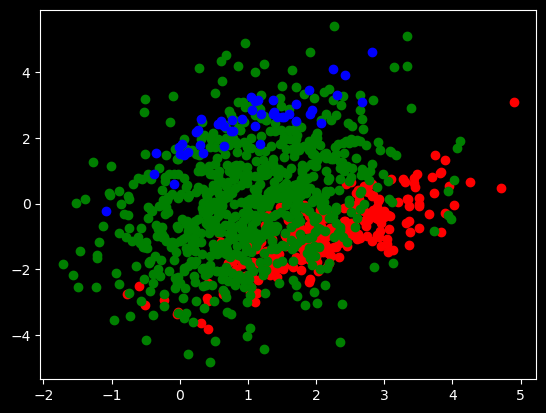

In [11]:
plt.style.use('dark_background')
plt.scatter(X_test[y_test==0][:,0],X_test[y_test==0][:,1],color='r')
plt.scatter(X_test[y_test==1][:,0],X_test[y_test==1][:,1],color='g')
plt.scatter(X_test[y_test==2][:,0],X_test[y_test==2][:,1],color='b')

Accuracy  0.8266666666666667
[[194  54   0]
 [ 77 672   6]
 [  0  45   2]]
F1 score 0.5670175799464657


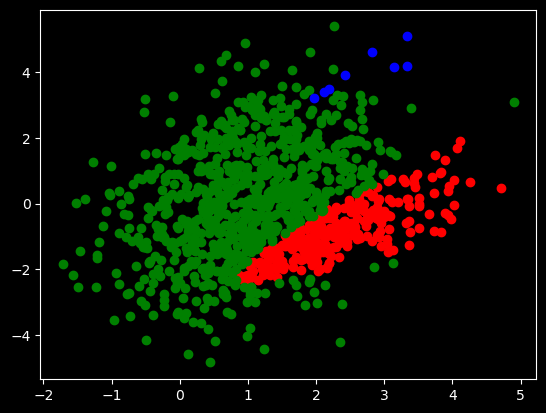

In [12]:
lda = QDA()
lda.fit(X_train, y_train)
y_pred=lda.score(X_test, y_test)
print(c_m(y_test, y_pred))
print('F1 score', f1_score(y_test, y_pred, average='macro'))
plt.scatter(X_test[y_pred==0][:,0],X_test[y_pred==0][:,1],color='r')
plt.scatter(X_test[y_pred==1][:,0],X_test[y_pred==1][:,1],color='g')
plt.scatter(X_test[y_pred==2][:,0],X_test[y_pred==2][:,1],color='b')

Accuracy  0.6914285714285714
[[229  24   0]
 [192 441 106]
 [  0   2  56]]
F1 score 0.6399864717416426


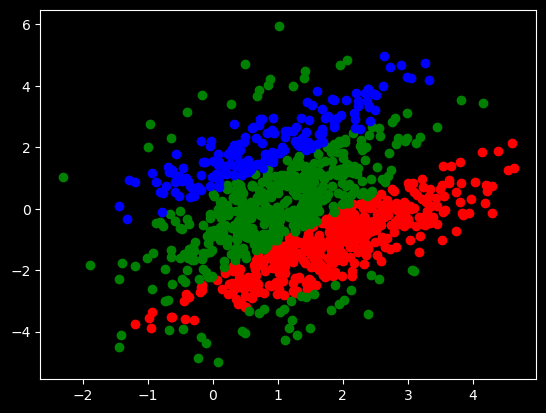

In [264]:
lda = LDA(priors='ignore')
lda.fit(X_train, y_train)
y_pred=lda.score(X_test, y_test)
print(c_m(y_test, y_pred))
print('F1 score', f1_score(y_test, y_pred, average='macro'))
plt.scatter(X_test[y_pred==0][:,0],X_test[y_pred==0][:,1],color='r')
plt.scatter(X_test[y_pred==1][:,0],X_test[y_pred==1][:,1],color='g')
plt.scatter(X_test[y_pred==2][:,0],X_test[y_pred==2][:,1],color='b')

[[234  14   0]
 [163 472 120]
 [  0   0  47]]
Accuracy  0.7171428571428572
F1 score 0.6418368684288523


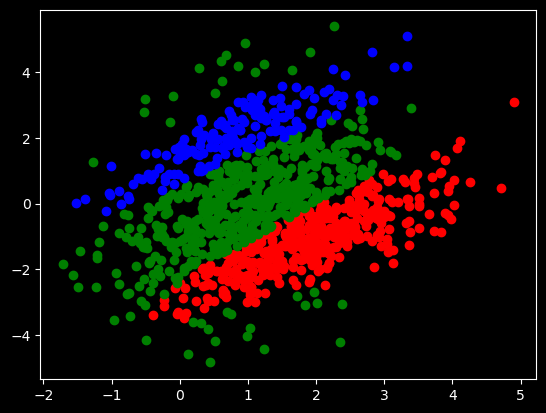

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score as a_c
model=QuadraticDiscriminantAnalysis(priors=(1,1,1))
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(c_m(y_test, y_pred))
print('Accuracy ',a_c(y_test,y_pred))
print('F1 score', f1_score(y_test, y_pred, average='macro'))
plt.scatter(X_test[y_pred==0][:,0],X_test[y_pred==0][:,1],color='r')
plt.scatter(X_test[y_pred==1][:,0],X_test[y_pred==1][:,1],color='g')
plt.scatter(X_test[y_pred==2][:,0],X_test[y_pred==2][:,1],color='b')